In [37]:
import numpy as np
import runner
import matplotlib.pyplot as plt
import scipy

from scipy.signal import hilbert


# Synchronization

In [2]:
# TODO: load persisted model to skip training time
model = runner.run(modified_params={})

building synapses...
build synapses time: 0.4844539165496826s
------------------ running network!
runtime: 18.3


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


In [14]:
neuron_1 = model['model_results']['net']['v_all_neurons_e'][0][:100] # only 2 neurons
neuron_2 = model['model_results']['net']['v_all_neurons_e'][1][:100] # only 2 neurons

# TODO: provide local field potentials

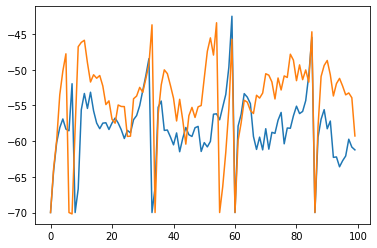

In [15]:
plt.plot(neuron_1)
plt.plot(neuron_2)
plt.show()

## Phase Synchronization

* http://www.scholarpedia.org/article/Synchronization_measures#Phase_synchronization
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html


Phase difference of: 0.001037354779746262
Phase difference of: 0.00022953883173734813


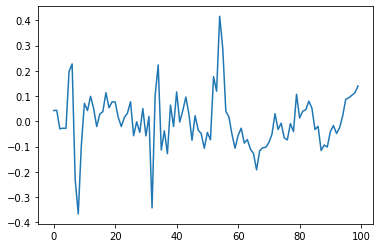

Text(0.5, 1.0, 'Instantaneous Phase')

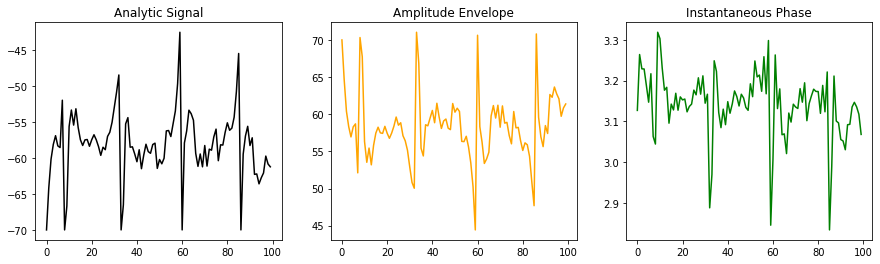

In [70]:
def hilphase(y1,y2):
    sig1_hill=hilbert(y1)
    sig2_hill=hilbert(y2)
    pdt=(np.inner(sig1_hill,np.conj(sig2_hill)) / (np.sqrt(np.inner(sig1_hill,
               np.conj(sig1_hill))*np.inner(sig2_hill,np.conj(sig2_hill)))))
    phase = np.angle(pdt)
    return phase

def hilphase_2(y1,y2):
    sig1_hill=hilbert(y1)
    sig2_hill=hilbert(y2)
    
    phase_y1=np.unwrap(np.angle(sig1_hill))
    phase_y2=np.unwrap(np.angle(sig2_hill))
    
    Inst_phase_diff=phase_y1-phase_y2
    avg_phase=np.average(Inst_phase_diff)
    
    return Inst_phase_diff,avg_phase

phase = hilphase(neuron_1, neuron_2)
print("Phase difference of:", phase)

phase_diff, avg_phase = hilphase_2(neuron_1, neuron_2)
plt.plot(phase_diff)
plt.show()

print("Phase difference of:", avg_phase)


analytic_signal = hilbert(neuron_1)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(analytic_signal, c='black')
axs[0].set_title("Analytic Signal")

axs[1].plot(amplitude_envelope, c='orange')
axs[1].set_title("Amplitude Envelope")

axs[2].plot(instantaneous_phase, c='green')
axs[2].set_title("Instantaneous Phase")



## Cross Correlate

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html

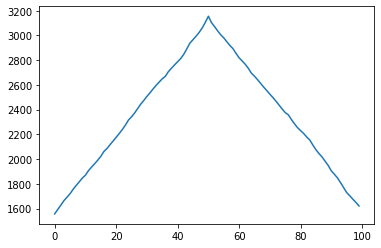

In [57]:
correlate = scipy.signal.correlate(neuron_1, neuron_2, mode='same') / neuron_1.shape[0]
plt.plot(correlate)

## Coherence

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.coherence.html

Text(0, 0.5, 'Coherence')

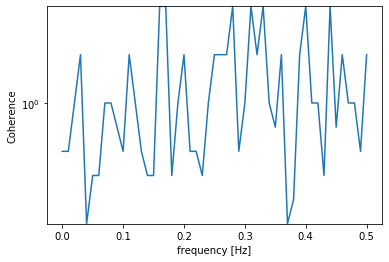

In [54]:
f, Cxy = scipy.signal.coherence(neuron_1, neuron_2)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
